<a href="https://colab.research.google.com/github/arriagajorge/PCA-Cluster/blob/main/Tarea2_SML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notas técnicas

## Reiniciar

En caso de que el colab se desconecte es necesario volver a cargar todo para volver a ejecutar todo, clic en `Entorno de ejecución -> Ejecutar todas` o `Ctrl + F9`

## Clonar un repositorio

Vamos a clonar un reositorio de github donde se encuentra el csv para trabjar con los datos, la siguiente línea de código es la que hace esta instrucción

In [2]:
!git clone https://github.com/arriagajorge/PCA-Cluster

fatal: destination path 'PCA-Cluster' already exists and is not an empty directory.


## Cargar *R*

El kernel de este collab es python así que vamos a cambiarlo para poder trabajar en R con la siguiente instrucción

In [3]:
%load_ext rpy2.ipython

en realidad lo que hicimos fue como instalar un kernel que pueda ejecutar R, lo "malo" de esto es que cada que queramos utilizar R será necasrio iniciar la celda con %%R para que pueda ejecutar el código en R.

## Cargar csv

In [4]:
%%R
# si quieren cambienle el nombre
 df_jol <- read.csv("/content/PCA-Cluster/JolicoeurSizeShape48.csv")

In [5]:
%%R 
# en la línea de ' %%R'  solo debe ir eso
head(df_jol)

  sex length width height
1   1     93    74     37
2   1     94    78     35
3   1     96    80     35
4   1    101    84     39
5   1    102    85     38
6   1    103    81     37


## Instalar una librería

Hay librerías que vienen previamente cargadas, por ejemplo la librerías `ggplot2` o `tidyr`

In [6]:
%%R
library(tidyr)
library(ggplot2)

Sin embargo hay algunas librerías que no vienen previamente cargadas, por ejemplo la librería `tseries`

In [7]:
%%R 
# library(tseries)

# R[write to console]: Error in library(sampling) : there is no package called ‘sampling’


#Error in library(sampling) : there is no package called ‘sampling’
#----------------------------------------------------------------------

NULL


Lo que hacemos es instalar la librería como normamelte se hace 
```{R}
install.packages("library")
library(library)
```

In [8]:
%%R
# EJEMPLO
# install.packages("tseries")
# library(tseries)

NULL


## Guardar una imágen permanentemente

In [9]:
%%R
# idicamos el formato 
pdf("my_plot.pdf")

# Customizing the output
#pdf("my_plot.pdf",         # File name
#    width = 4, height = 4, # Width and height in inches
#    bg = "white",          # Background color
#    colormodel = "cmyk")   # Color model (cmyk is required for most publications)

# hacemos la gráfica
x <- 1:100
y <- 3+x + rnorm(100)
plot(x,y)

dev.off()

png 
  2 


Nuestra imágen ya se guardo (para verla clic en archivos (en la caprpeta del lado izquierdo), doble clic para descargarla)

# Ejercicios

## Ejercicio 1
ej. 3 capítulo 12 de ISL

En este problema usted realizará manuealmente la implementación de $k-means$, con $k=2$, en un pequeño ejemplo con $n=6$ observaciones y $p=2$ características. Las observaciones son las siguientes.

### a) Gráfica las observaciones

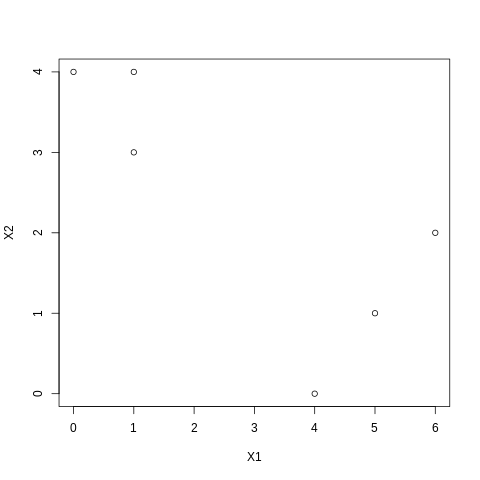

In [10]:
%%R 
X1<-c(1,1,0,5,6,4)
X2<-c(4,3,4,1,2,0)
obs<-data.frame(X1,X2)
plot(obs)

**Solución/Explicación** Podemos notar que se nota a primera vista que existen dos grupos y están bien denotados.

### b) Asigna aleatoriamente una etiqueta de cluster a cada observación. Para ello puede utilizar el comando $\texttt{sample()}$ en $\texttt{R}$ para hacerlo. Informe las etiquetas de cada observación.

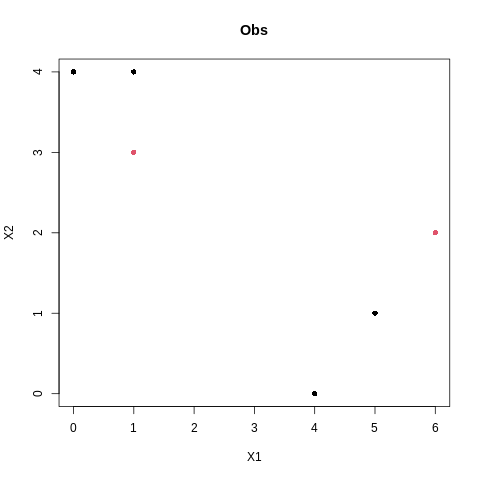

In [11]:
%%R 
n<-6
set.seed(1); cluster <- sample(c(1,2),size = n,replace =T)
cluster1<-cluster
centroids <- matrix(NA, nrow = 2, ncol = 2)

plot(obs, col = cluster,pch = 16,xlab = 'X1', ylab =  'X2', main = 'Obs' )


**Solución/Explicación** Notamos que en esta primera iteración las observaciones quedan mezcladas con respecto a nuestro gráfico original. 

### c) Calcule el centroide de cada cluster

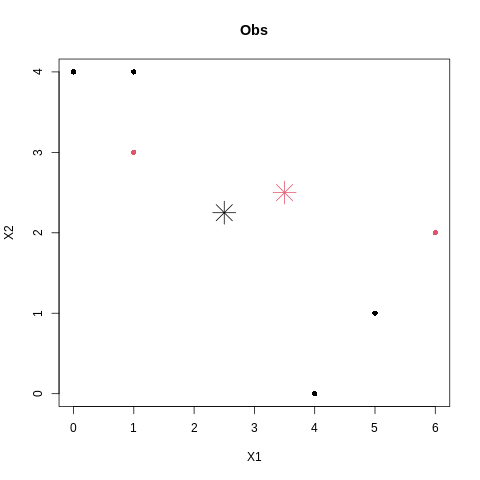

In [12]:
%%R 
getCentroids <- function(centroids,cluster){
  for (i in 1:2){
    centroids[i,] = colMeans(obs[which(cluster == i),])
  }
  return(centroids)
}
centroids = getCentroids(centroids,cluster)
plot(obs, col = cluster,pch = 16,xlab = 'X1', ylab =  'X2', main = 'Obs' )
points(centroids,pch = 8, col = 1:2, cex = 3)

**Solución/Explicación** Vemos que los centroides de ambos grupos están ligeramente cercanos uno del otro.

### d) Asigne cada observación al centroide al que más se acerque, en términos de distancia euclidiana. Informar de las etiquetas de los clusters para cada observación.

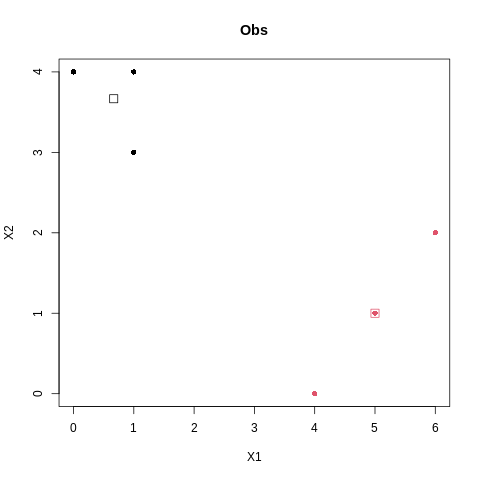

In [13]:
%%R 
k<-1
d <- function(x1, x2) sqrt(sum((x1 - x2)^2))
recluster <- function(centroids,cluster){
  for (i in 1:n){
    d1 = d(centroids[1,],obs[i,])
    d2 = d(centroids[2,],obs[i,])
    cluster[i] = which(c(d1,d2) == min(d1,d2))
  }
  return(cluster)
}
centroids1 = centroids
  cluster = recluster(centroids,cluster)
  centroids = getCentroids(centroids,cluster)
  plot(obs, col = cluster,pch = 16,xlab = 'X1', ylab =  'X2', main = 'Obs' )
  points(centroids, col = 1:2, cex = 1.5, pch=0)

**Solución/Explicación** Notamos que efectivamente los centroides han cambiado con respecto a nuestra gráfica anterior, de igual forma ciertos puntos han sido re-etiquetados.

### e) Repite (c) y (d) hasta que las respuestas obtenidas dejen de cambiar.

[1] TRUE


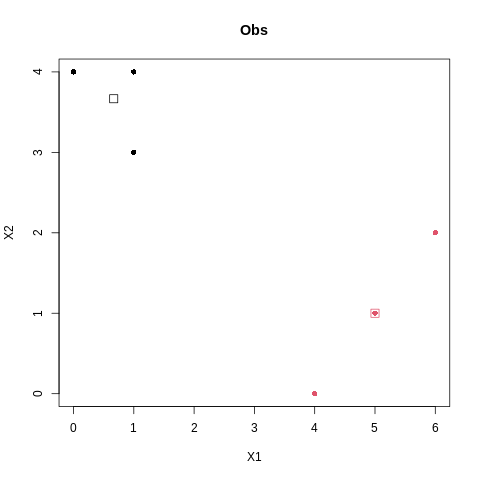

In [14]:
%%R 
centroids1 = centroids
  cluster = recluster(centroids,cluster)
  centroids = getCentroids(centroids,cluster)
  plot(obs, col = cluster,pch = 16,xlab = 'X1', ylab =  'X2', main = 'Obs' )
  points(centroids, col = 1:2, cex = 1.5, pch=0)
sum(centroids-centroids1) == 0

**Solución/Explicación** Notamos que desde el inciso anterior habíamos obtenido nuestro resultado final puesto que hemos notado que el centroide anterior y este nuevo son iguales por lo que nuestro resultado ya no ha cambiado.

### f) En su gráfico de (a), coloree las observaciones según las etiquetas de clústeres obtenidas.

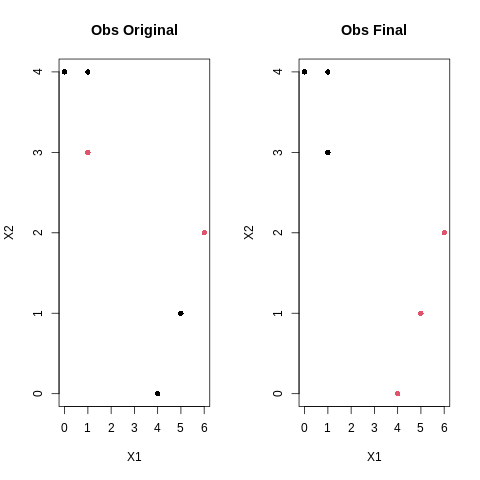

In [15]:
%%R 
par(mfrow=c(1,2))
plot(obs, col = cluster1,pch = 16,xlab = 'X1', ylab =  'X2', main = 'Obs Original' )
plot(obs, col = cluster,pch = 16,xlab = 'X1', ylab =  'X2', main = 'Obs Final' )

**Solución/Explicación** Notando que efectivamente nuestro gráfico con las observaciones finales tienen los colores que inicialmente habíamos deducido como un posible resultado.

## Ejercicio 2

ej. 9 capítulo 12 de ISL

Consideremos los datos de $\texttt{USArrests}$. A continuación, realizaremos una agrupación jerárquica (hierarchical clustering) de los estados.

### a) Utilizando la agrupación jerárquica con enlace completo y distancia euclidiana, agrupar los estados.

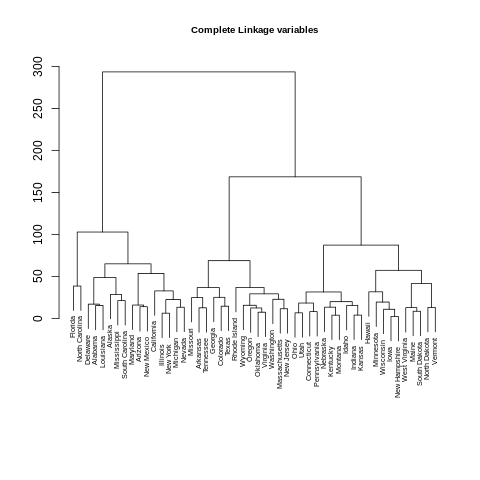

In [16]:
%%R 
data<-USArrests
hcl <- hclust(dist(data))
par(mfrow=c(1,1))
plot(hcl,main="Complete Linkage variables",
     xlab="", sub="",ylab="", cex=.6,cex.main=.8)

**Solución/Explicación** aquí va lo que se va poner en el reporte

### b)  Corte el dendrograma a una altura que dé lugar a tres clusters. ¿Qué estados pertenecen a qué clústeres?

In [17]:
%%R 
cluster3=cutree(hcl, 3)
cbind(data[,1], cluster3)

                    cluster3
Alabama        13.2        1
Alaska         10.0        1
Arizona         8.1        1
Arkansas        8.8        2
California      9.0        1
Colorado        7.9        2
Connecticut     3.3        3
Delaware        5.9        1
Florida        15.4        1
Georgia        17.4        2
Hawaii          5.3        3
Idaho           2.6        3
Illinois       10.4        1
Indiana         7.2        3
Iowa            2.2        3
Kansas          6.0        3
Kentucky        9.7        3
Louisiana      15.4        1
Maine           2.1        3
Maryland       11.3        1
Massachusetts   4.4        2
Michigan       12.1        1
Minnesota       2.7        3
Mississippi    16.1        1
Missouri        9.0        2
Montana         6.0        3
Nebraska        4.3        3
Nevada         12.2        1
New Hampshire   2.1        3
New Jersey      7.4        2
New Mexico     11.4        1
New York       11.1        1
North Carolina 13.0        1
North Dakota  

**Solución/Explicación** Hemos cortado el dendograma para obtener 3 clusters y también hemos dado una tabla donde se encuentran los estados catalogados por el cluster donde corresponden. Por ejemplo: Alabama a cluster 1, Arkansas cluster 2, Hawaii cluster 3, etc.

### c) Agrupar jerárquicamente los estados utilizando la vinculación completa y la distancia euclidiana, después de escalar las variables para que tengan una desviación estándar de uno.

In [18]:
%%R 
hcl1<-hclust(dist(scale(data)), method="complete")

**Solución/Explicación** aquí va lo que se va poner en el reporte

### d) ¿Qué efecto tiene el escalado de las variables en el clustering jerárquico obtenido? En su opinión, ¿se deberían escalar las variables antes de calcular las disimilitudes entre las observaciones? Justifique su respuesta. 

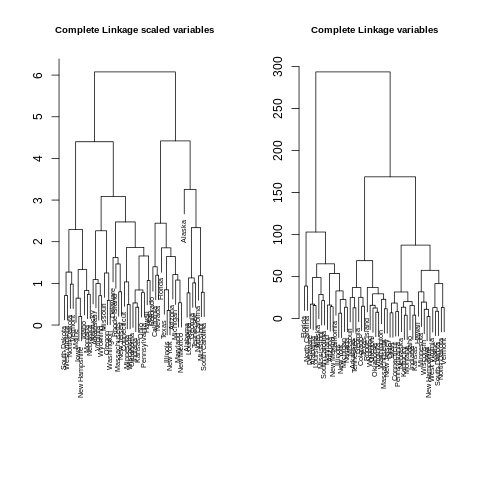

In [19]:
%%R 
par(mfrow=c(1,2))
plot(hcl1,main="Complete Linkage scaled variables",
     xlab="", sub="",ylab="", cex=.6,cex.main=.8)
plot(hcl,main="Complete Linkage variables",
     xlab="", sub="",ylab="", cex=.6,cex.main=.8)

**Solución/Explicación** aquí va lo que se va poner en el reporte

## Ejercicio 3
ej. 13 capítulo 12 de ISL

En el sitio web del libro, www.statlearning.com, hay un conjunto de datos de expresión génica ($\texttt{Ch12Ex13.csv}$) que consta de 40 muestras de tejido con mediciones de 1.000 genes. Las primeras 20 muestras son de pacientes sanos sanos, mientras que las segundas 20 son de un grupo de enfermos.

### a) Cargue los datos utilizando $\texttt{read.csv()}$ .Deberá seleccionar $\texttt{header = F}$.

In [20]:
%%R
# https://www.statlearning.com/resources-second-edition
df_ch <-  read.csv("/content/PCA-Cluster/Ch12Ex13.csv", header=F)
head(df_ch,2)

          V1         V2         V3        V4         V5        V6          V7
1 -0.9619334  0.4418028 -0.9750051  1.417504  0.8188148 0.3162937 -0.02496682
2 -0.2925257 -1.1392670  0.1958370 -1.281121 -0.2514393 2.5119970 -0.92220620
           V8          V9        V10        V11        V12       V13        V14
1 -0.06396600  0.03149702 -0.3503106 -0.7227299 -0.2819547 1.3375150  0.7019798
2  0.05954277 -1.40964500 -0.6567122 -0.1157652  0.8259783 0.3464496 -0.5695486
         V15        V16        V17       V18        V19        V20       V21
1  1.0076160 -0.4653828  0.6385951 0.2867807 -0.2270782 -0.2200452 -1.242573
2 -0.1315365  0.6902290 -0.9090382 1.3026420 -1.6726950 -0.5255040  0.797970
         V22        V23        V24        V25        V26        V27        V28
1 -0.1085056 -1.8642620 -0.5005122 -1.3250080  1.0634110 -0.2963712 -0.1216457
2 -0.6897930  0.8995305  0.4285812 -0.6761141 -0.5340949 -1.7325070 -1.6034470
          V29        V30        V31          V32         V

**Solución/Explicación** aquí va lo que se va poner en el reporte

### b) Aplique la agrupación jerárquica a las muestras utilizando la distancia basada en la correlación y trace el dendrogram. ¿Los genes separan las muestras en los dos grupos? ¿Dependen sus resultados del tipo de enlace utilizado?

In [21]:
%%R 
# Aquí va el código 

# line 1
# line 2
# .
# .
# .

NULL


**Solución/Explicación** aquí va lo que se va poner en el reporte

### c) Su colaborador quiere saber qué genes difieren más en los dos grupos. Sugiera una forma de responder a esta pregunta y aplíquela aquí

In [22]:
%%R 
# Aquí va el código 

# line 1
# line 2
# .
# .
# .

NULL


**Solución/Explicación** aquí va lo que se va poner en el reporte

## Ejercicio 4
Considere la base de datos $\texttt{JoliecoeurSizeShape48.csv}$ correspondiente a 4 mediciones en 48 especímenes. ESta base proviene del trabajo $\textit{Size and sahpe variation in the painted turtle. A principal components analysis.}$ P. Jolicoeurm and J. Mosimann, Walker Museum, University of Chicago and Institut de Biologie Universite de Montreal.

Considere las tres variables $\textit{length, width}$ y $\textit{height}$, y sin usar la variable $\textit{sex}$ realice un an análisis de componentes principales considerando a las variables originales y en un segundo análisis a las variables estandarizadas a tener varianza uno y media cero. Elija uno de los dos análisis, justifique su elección y realice lo siguiente.

### i) Reporte el valor de los eigenvalores (varianzas) obetenidos y su gráfica.

[1] "sdev"     "rotation" "center"   "scale"    "x"       
Importance of components:
                          PC1     PC2     PC3
Standard deviation     1.7134 0.20699 0.14635
Proportion of Variance 0.9786 0.01428 0.00714
Cumulative Proportion  0.9786 0.99286 1.00000
Importance of components:
                           PC1    PC2     PC3
Standard deviation     25.3294 2.2813 1.95721
Proportion of Variance  0.9861 0.0080 0.00589
Cumulative Proportion   0.9861 0.9941 1.00000
[1] 2.93573765 0.04284387 0.02141848
[1] 641.577533   5.204385   3.830670


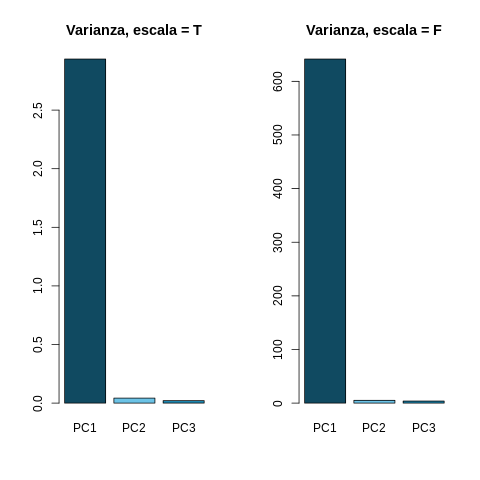

In [23]:
%%R 
# Aquí va el código 

pc_scT <- prcomp(df_jol[,-1], scale = T)
pc_scF <- prcomp(df_jol[,-1], scale = F)

print(names(pc_scT))
print(summary(pc_scT))
print(summary(pc_scF))

print(pc_scT$sdev^2)
print(pc_scF$sdev^2)

par(mfrow=c(1,2))
barplot(pc_scT$sdev^2, names.arg = c("PC1", "PC2", "PC3"), col=c("#104A61", "#6CC3E6", "#1D85AD"), main = "Varianza, escala = T")
barplot(pc_scF$sdev^2, names.arg = c("PC1", "PC2", "PC3"), col=c("#104A61", "#6CC3E6", "#1D85AD"), main = "Varianza, escala = F")


In [24]:
%%R
#guardo la imágen
pdf("4_1.pdf")

par(mfrow=c(1,2))
barplot(pc_scT$sdev^2, names.arg = c("PC1", "PC2", "PC3"), col=c("#104A61", "#6CC3E6", "#1D85AD"), main = "Varianza, escala = T")
barplot(pc_scF$sdev^2, names.arg = c("PC1", "PC2", "PC3"), col=c("#104A61", "#6CC3E6", "#1D85AD"), main = "Varianza, escala = F")

dev.off()

png 
  2 


**Solución/Explicación** aquí va lo que se va poner en el reporte

Lo primeto que notamos es que con un solo primer componnete principal expliacamos el 98% de la varianza ....


### ii) Comente sobre los porcentajes individuales y acumulados de varianza explicada por los CPs. 



In [25]:
%%R 
print(summary(pc_scT))
print(summary(pc_scF))
names(pc_scT)

Importance of components:
                          PC1     PC2     PC3
Standard deviation     1.7134 0.20699 0.14635
Proportion of Variance 0.9786 0.01428 0.00714
Cumulative Proportion  0.9786 0.99286 1.00000
Importance of components:
                           PC1    PC2     PC3
Standard deviation     25.3294 2.2813 1.95721
Proportion of Variance  0.9861 0.0080 0.00589
Cumulative Proportion   0.9861 0.9941 1.00000
[1] "sdev"     "rotation" "center"   "scale"    "x"       


**Solución/Explicación** aquí va lo que se va poner en el reporte

### iii) Presente las gráficas de dispersión por pares de las tres variables originales coloredas de acuerdo a la variable sexo.

In [26]:
%%R
names(df_jol)
str(df_jol)
df_jol$sex <- as.factor(df_jol$sex)
str(df_jol)

'data.frame':	48 obs. of  4 variables:
 $ sex   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ length: int  93 94 96 101 102 103 104 106 107 112 ...
 $ width : int  74 78 80 84 85 81 83 83 82 89 ...
 $ height: int  37 35 35 39 38 37 39 39 38 40 ...
'data.frame':	48 obs. of  4 variables:
 $ sex   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ length: int  93 94 96 101 102 103 104 106 107 112 ...
 $ width : int  74 78 80 84 85 81 83 83 82 89 ...
 $ height: int  37 35 35 39 38 37 39 39 38 40 ...


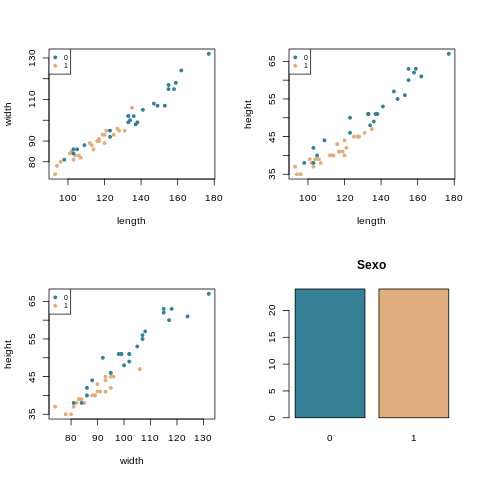

In [27]:
%%R
par(mfrow=c(2,2))
plot(df_jol$length, df_jol$width, col=c("#358094", "#E0AD7E")[df_jol$sex], cex=.7, pch=19,
     xlab = "length", ylab="width")
legend(
  x ="topleft",
  legend = paste("", levels(df_jol$sex)), # for readability of legendç
  col = c("#358094", "#E0AD7E"),
  pch = 19, # same as pch=20, just smaller
  cex = .7 # scale the legend to look attractively sized
)
plot(df_jol$length, df_jol$height, col=c("#358094", "#E0AD7E")[df_jol$sex], cex=.7, pch=19,
     xlab = "length", ylab="height")
legend(
  x ="topleft",
  legend = paste("", levels(df_jol$sex)), # for readability of legendç
  col = c("#358094", "#E0AD7E"),
  pch = 19, # same as pch=20, just smaller
  cex = .7 # scale the legend to look attractively sized
)
plot(df_jol$width, df_jol$height, col=c("#358094", "#E0AD7E")[df_jol$sex], cex=.7, pch=19, 
     xlab = "width", ylab="height")
legend(
  x ="topleft",
  legend = paste("", levels(df_jol$sex)), # for readability of legendç
  col = c("#358094", "#E0AD7E"),
  pch = 19, # same as pch=20, just smaller
  cex = .7 # scale the legend to look attractively sized
)
#no se que gráfico poner :( para que se acomplete bonito
plot(df_jol$sex, col = c("#358094", "#E0AD7E"), main = "Sexo")

In [28]:
%%R
pdf("4_3.pdf")
par(mfrow=c(2,2))
plot(df_jol$length, df_jol$width, col=c("#358094", "#E0AD7E")[df_jol$sex], cex=.7, pch=19,
     xlab = "length", ylab="width")
legend(
  x ="topleft",
  legend = paste("", levels(df_jol$sex)), # for readability of legendç
  col = c("#358094", "#E0AD7E"),
  pch = 19, # same as pch=20, just smaller
  cex = .7 # scale the legend to look attractively sized
)
plot(df_jol$length, df_jol$height, col=c("#358094", "#E0AD7E")[df_jol$sex], cex=.7, pch=19,
     xlab = "length", ylab="height")
legend(
  x ="topleft",
  legend = paste("", levels(df_jol$sex)), # for readability of legendç
  col = c("#358094", "#E0AD7E"),
  pch = 19, # same as pch=20, just smaller
  cex = .7 # scale the legend to look attractively sized
)
plot(df_jol$width, df_jol$height, col=c("#358094", "#E0AD7E")[df_jol$sex], cex=.7, pch=19, 
     xlab = "width", ylab="height")
legend(
  x ="topleft",
  legend = paste("", levels(df_jol$sex)), # for readability of legendç
  col = c("#358094", "#E0AD7E"),
  pch = 19, # same as pch=20, just smaller
  cex = .7 # scale the legend to look attractively sized
)
#no se que gráfico poner :( para que se acomplete bonito
plot(df_jol$sex, col = c("#358094", "#E0AD7E"), main = "Sexo")
dev.off()

png 
  2 


**Solución/Explicación** aquí va lo que se va poner en el reporte

### iv) Presente los tres eigenvectores, equivalentemente las tres variables transformadas o CPs. ¿Qué característica Observa en los coeficientes del primer componente principal?

In [29]:
%%R
print("escalado")
print(pc_scT$rotation)
print("no escalado")
print(pc_scF$rotation)
# eigvec 1
print("eigvec1; escalado, no escalado")
print(pc_scT$rotation[,1])
print(pc_scF$rotation[,1])
# eigvec 2
print("eigvec2; escalado, no escalado")
print(pc_scT$rotation[,2])
print(pc_scF$rotation[,2])
# eigvec 3
print("eigvec3; escalado, no escalado")
print(pc_scT$rotation[,3])
print(pc_scF$rotation[,3])

[1] "escalado"
             PC1        PC2         PC3
length 0.5787981 -0.3250273  0.74789704
width  0.5779840 -0.4834699 -0.65741263
height 0.5752628  0.8127817 -0.09197088
[1] "no escalado"
             PC1        PC2         PC3
length 0.8068646 -0.5865919 -0.06985282
width  0.4947448  0.7356259 -0.46269006
height 0.3227958  0.3387689  0.88376382
[1] "eigvec1; escalado, no escalado"
   length     width    height 
0.5787981 0.5779840 0.5752628 
   length     width    height 
0.8068646 0.4947448 0.3227958 
[1] "eigvec2; escalado, no escalado"
    length      width     height 
-0.3250273 -0.4834699  0.8127817 
    length      width     height 
-0.5865919  0.7356259  0.3387689 
[1] "eigvec3; escalado, no escalado"
     length       width      height 
 0.74789704 -0.65741263 -0.09197088 
     length       width      height 
-0.06985282 -0.46269006  0.88376382 


**Solución/Explicación** aquí va lo que se va poner en el reporte

### v) Presente las gráficas de dispersión por pares de los tres CPs, tambien coloreadas de acuerdo a la variable sexo.

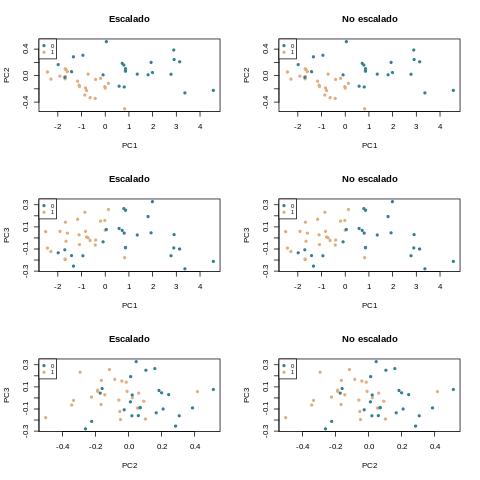

In [30]:
%%R 
par(mfrow = c(3,2))
plot(pc_scT$x[,1], pc_scT$x[,2], col=c("#358094", "#E0AD7E")[df_jol$sex], cex=.7, pch=19,
     xlab = "PC1", ylab="PC2", main="Escalado")
legend(
  x ="topleft",
  legend = paste("", levels(df_jol$sex)), # for readability of legendç
  col = c("#358094", "#E0AD7E"),
  pch = 19, # same as pch=20, just smaller
  cex = .7 # scale the legend to look attractively sized
)
plot(pc_scT$x[,1], pc_scT$x[,2], col=c("#358094", "#E0AD7E")[df_jol$sex], cex=.7, pch=19,
     xlab = "PC1", ylab="PC2", main="No escalado")
legend(
  x ="topleft",
  legend = paste("", levels(df_jol$sex)), # for readability of legendç
  col = c("#358094", "#E0AD7E"),
  pch = 19, # same as pch=20, just smaller
  cex = .7 # scale the legend to look attractively sized
)

plot(pc_scT$x[,1], pc_scT$x[,3], col=c("#358094", "#E0AD7E")[df_jol$sex], cex=.7, pch=19,
     xlab = "PC1", ylab="PC3", main="Escalado")
legend(
  x ="topleft",
  legend = paste("", levels(df_jol$sex)), # for readability of legendç
  col = c("#358094", "#E0AD7E"),
  pch = 19, # same as pch=20, just smaller
  cex = .7 # scale the legend to look attractively sized
)
plot(pc_scT$x[,1], pc_scT$x[,3], col=c("#358094", "#E0AD7E")[df_jol$sex], cex=.7, pch=19,
     xlab = "PC1", ylab="PC3", main="No escalado")
legend(
  x ="topleft",
  legend = paste("", levels(df_jol$sex)), # for readability of legendç
  col = c("#358094", "#E0AD7E"),
  pch = 19, # same as pch=20, just smaller
  cex = .7 # scale the legend to look attractively sized
)

plot(pc_scT$x[,2], pc_scT$x[,3], col=c("#358094", "#E0AD7E")[df_jol$sex], cex=.7, pch=19,
     xlab = "PC2", ylab="PC3", main="Escalado")
legend(
  x ="topleft",
  legend = paste("", levels(df_jol$sex)), # for readability of legendç
  col = c("#358094", "#E0AD7E"),
  pch = 19, # same as pch=20, just smaller
  cex = .7 # scale the legend to look attractively sized
)
plot(pc_scT$x[,2], pc_scT$x[,3], col=c("#358094", "#E0AD7E")[df_jol$sex], cex=.7, pch=19,
     xlab = "PC2", ylab="PC3", main="No escalado")
legend(
  x ="topleft",
  legend = paste("", levels(df_jol$sex)), # for readability of legendç
  col = c("#358094", "#E0AD7E"),
  pch = 19, # same as pch=20, just smaller
  cex = .7 # scale the legend to look attractively sized
)

In [31]:
%%R
install.packages("plot3D")
library("plot3D")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘misc3d’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/misc3d_0.9-1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 66802 bytes (65 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

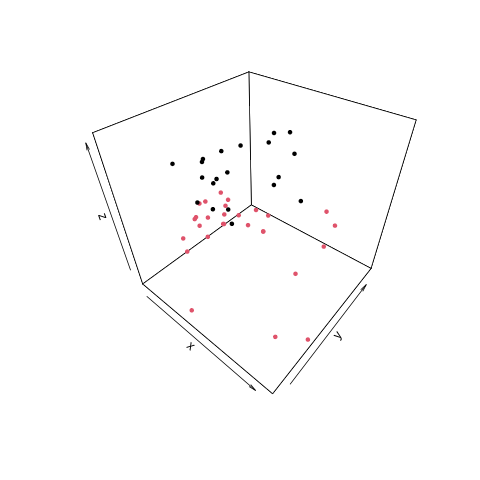

In [32]:
%%R
scatter3D(pc_scT$x[,1], pc_scT$x[,2], pc_scT$x[,3], col=df_jol$sex, pch=19, cex=.7, colkey = FALSE)

**Solución/Explicación** aquí va lo que se va poner en el reporte

### vi) Comente sobre algún patron observado en las gráficas, e.g. agrupamientos o valores alejados o atípicos.

In [33]:
%%R 
# Aquí va el código 

# line 1
# line 2
# .
# .
# .

NULL


**Solución/Explicación** aquí va lo que se va poner en el reporte

### vii) Presente un biplot y comente sobre algunas características relevantes de los datos que el gráfico pudiese elucidar.

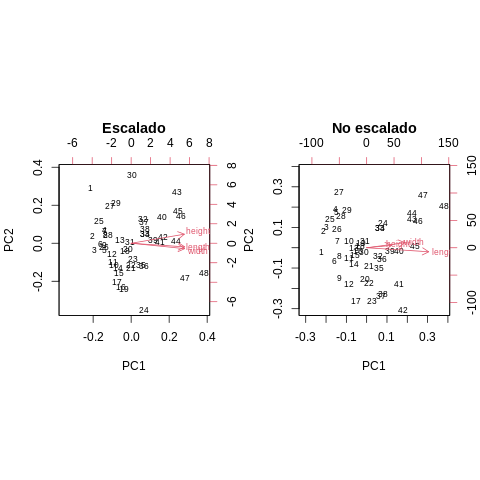

In [39]:
%%R 
par(mfrow=c(1,2))
biplot(pc_scT, cex=.7, main="Escalado")
biplot(pc_scF, cex=.7, main="No escalado")

**Solución/Explicación** aquí va lo que se va poner en el reporte

## Ejercicio 5 
Considere las 61 observaciones con 18 mediciones presentadas al final. Corresponden a 61 viruses con 18 mediciones. Este conjunto ha sido tentativamente clasificado por Fauquet et al. (1988) en cuatro grupos: ($1$) $\textit{hordeivirus}$, ($2$) $\textit{tobravirus}$, ($3$) $\textit{tobamovirus}$, y ($4$) $\textit{unclassified}$, con $3, 6, 39$ y $13$ viruses en cada grupo respectivamente. ESta clasificación se basa primordialmente en su modo de transmisión. Cada una de las mediciones corresponde al número de aminoácidos residuales por molécula de la capa de proteína. 

### i) Sin utilizar la variable tipo de virus y considerando únicamente las 18 mediciones, aplique el método $\textit{K-means}$ y el método $\textit{hirarchical}$ con las tres opciones; $\textit{complete, average y single link}$ Presente las particiones de forma gráfica. Analice las particiones obtenidas y comente si alguna de las particiones corresponde o se aproxima a la clasificación originalmente propuesta por Fauquet et al.

In [52]:
%%R 
# leer csv
df_virus <- read.csv("/content/PCA-Cluster/VirusDataSet.csv")
head(df_virus)
# Si reconoce a los NA
is.na(df_virus$transmission)
# El tipo de variables
str(df_virus)
# la variable factor se considrerá como factor
df_virus$classif_fau <- as.factor(df_virus$classif_fau)


# selección de variables para el agrupamiento
df_vir_sel <- df_virus[,-c(1:4)]
# comprobbamos que eectivamente sean 18
length(names(data))

'data.frame':	61 obs. of  22 variables:
 $ num         : int  182 311 312 309 310 327 328 330 331 47 ...
 $ virus       : chr  "BSMV" "BSMV" "BSMV" "TRV CAM" ...
 $ classif_fau : chr  "Hordeivirus" "Hordeivirus" "Hordeivirus" "Tobravirus" ...
 $ transmission: chr  NA NA NA "Nema" ...
 $ ASX         : int  25 26 25 15 17 22 21 20 22 17 ...
 $ THR         : int  9 9 9 10 11 17 18 9 10 13 ...
 $ SER         : int  9 9 9 21 22 17 18 16 17 14 ...
 $ GLX         : int  19 20 22 13 15 16 15 15 18 16 ...
 $ PRO         : int  12 13 10 18 14 10 11 16 13 4 ...
 $ GLY         : int  8 8 10 12 10 15 15 6 6 9 ...
 $ ALA         : int  20 20 23 22 23 13 16 17 21 14 ...
 $ CYS         : int  0 0 0 1 1 1 1 1 1 1 ...
 $ VAL         : int  10 10 13 9 11 7 7 7 8 13 ...
 $ MET         : int  0 0 0 2 2 2 2 3 3 0 ...
 $ ILE         : int  6 6 6 4 4 3 3 4 4 11 ...
 $ LEU         : int  21 21 17 11 11 14 14 14 13 13 ...
 $ TYR         : int  8 8 5 5 5 9 6 4 4 5 ...
 $ PHE         : int  7 7 6 10 9 9 8 11 11 7

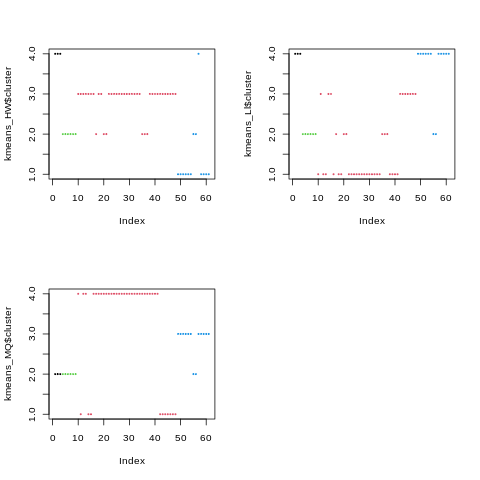

In [65]:
%%R

#semila
set.seed(1)
par(mfrow = c(2,2))
# algorithm = c("Hartigan-Wong", "Lloyd", "Forgy",
# "MacQueen")
kmeans_HW <- kmeans(df_vir_sel, centers = 4, nstart = 1, algorithm = "Hartigan-Wong")
plot(kmeans_HW$cluster, col=df_virus$classif_fau, cex=.3, pch=19)


kmeans_Ll <- kmeans(df_vir_sel, centers = 4, nstart = 1, algorithm = "Lloyd")
plot(kmeans_Ll$cluster, col=df_virus$classif_fau, cex=.3, pch=19)


kmeans_MQ <- kmeans(df_vir_sel, centers = 4, nstart = 1, algorithm = "MacQueen")
plot(kmeans_MQ$cluster, col=df_virus$classif_fau, cex=.3, pch=19)

# el mejor por el momento es HW

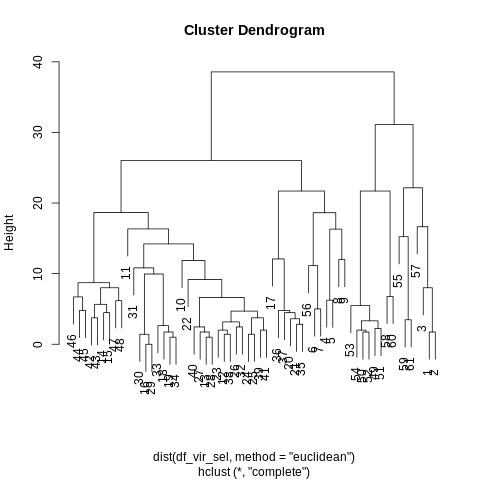

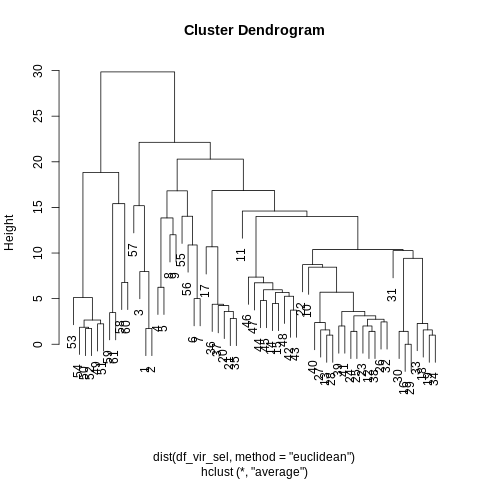

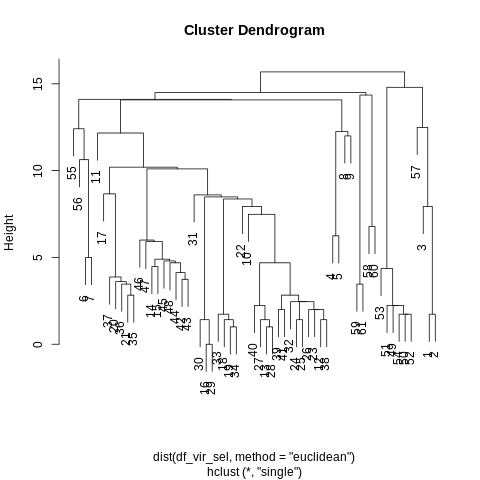

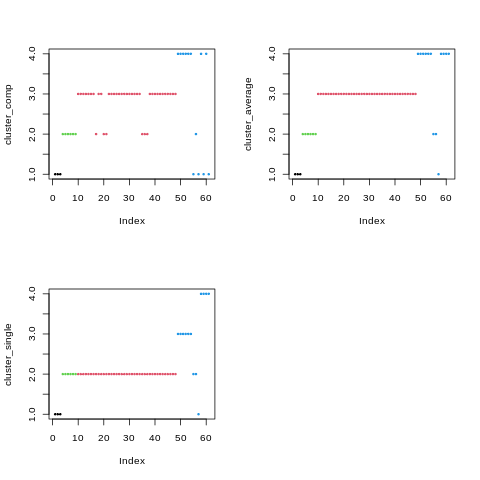

In [70]:
%%R
set.seed(1)
hcl_comp <- hclust(dist(df_vir_sel, method = "euclidean"), method = "complete")
cluster_comp=cutree(hcl_comp, 4)
hcl_average <- hclust(dist(df_vir_sel, method = "euclidean"), method = "average")
cluster_average=cutree(hcl_average, 4)
hcl_singlelink <- hclust(dist(df_vir_sel, method = "euclidean"), method = "single")
cluster_single=cutree(hcl_singlelink, 4)

plot(hcl_comp)
plot(hcl_average)
plot(hcl_singlelink)

par(mfrow = c(2,2))
plot(cluster_comp, col=df_virus$classif_fau, cex=.4, pch=19)
plot(cluster_average, col=df_virus$classif_fau, cex=.4, pch=19)
plot(cluster_single, col=df_virus$classif_fau, cex=.4, pch=19)

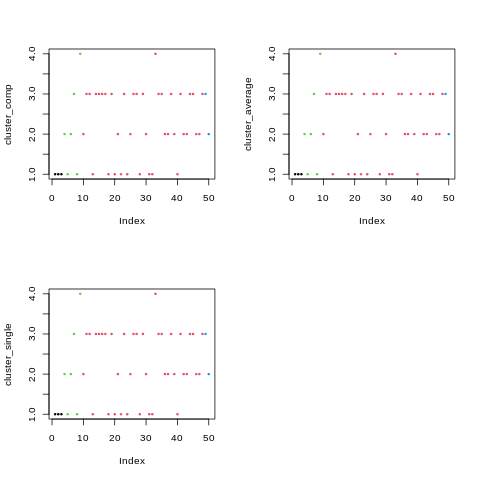

In [67]:
%%R
par(mfrow = c(2,2))
plot(cluster_comp, col=df_virus$classif_fau, cex=.4, pch=19)
plot(cluster_average, col=df_virus$classif_fau, cex=.4, pch=19)
plot(cluster_single, col=df_virus$classif_fau, cex=.4, pch=19)

In [71]:
# el ganador fue hclust() by average

**Solución/Explicación** aquí va lo que se va poner en el reporte

### ii) Nuevamente, sin considera a la variable tipo de virus y utilizando las 18 mediciones, aplique un análisis de componentes principales. 

In [91]:
%%R

pca_virus <- prcomp(df_vir_sel, scale=F)
summary(pca_virus)
names(pca_virus)

[1] "sdev"     "rotation" "center"   "scale"    "x"       


#### a) Presente la gráfica de los tres o cuatro primeros y de los dos últimos componentes principales coloreados de acuerdo al grupo de pertenencia originalmente propuesto por  Fauquet et al.

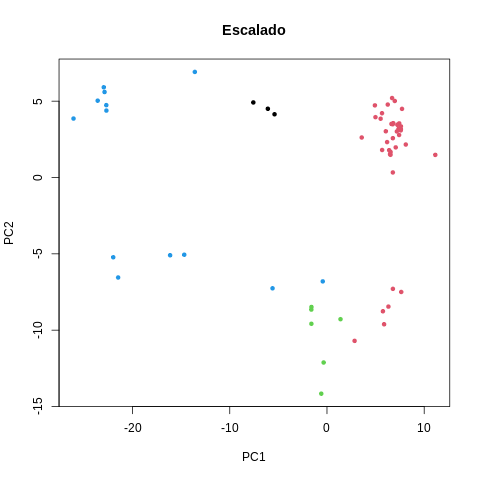

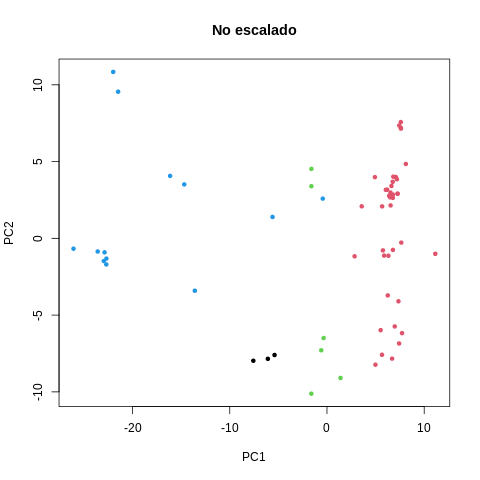

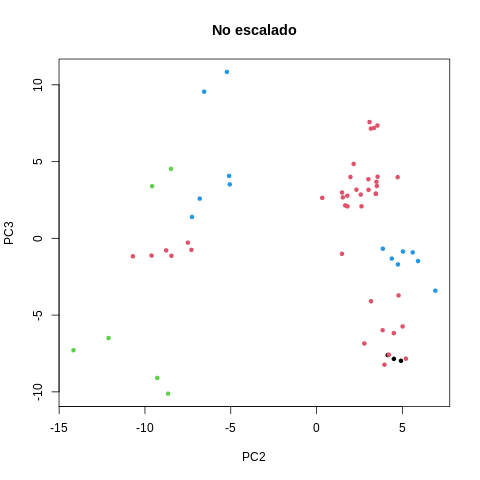

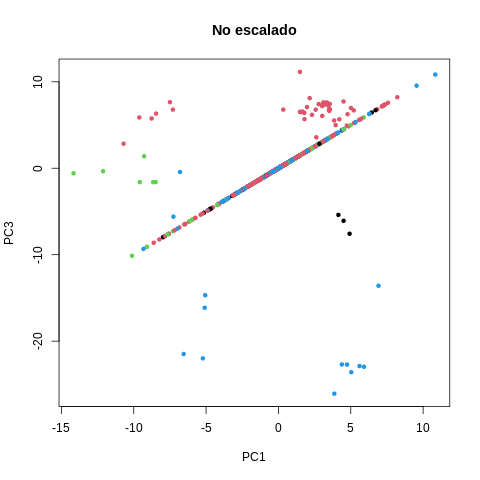

In [94]:
%%R 
plot(pca_virus$x[,1], pca_virus$x[,2], col=df_virus$classif_fau, cex=.7, pch=19,
     xlab = "PC1", ylab="PC2", main="Escalado")
#legend(
#  x ="topleft",
#  legend = paste("", levels(df_jol$sex)), # for readability of legendç
#  col = c("#358094", "#E0AD7E"),
#  pch = 19, # same as pch=20, just smaller
#  cex = .7 # scale the legend to look attractively sized
#)
plot(pca_virus$x[,1], pca_virus$x[,3], col=df_virus$classif_fau, cex=.7, pch=19,
     xlab = "PC1", ylab="PC2", main="No escalado")

plot(pca_virus$x[,2], pca_virus$x[,3], col=df_virus$classif_fau, cex=.7, pch=19,
     xlab = "PC2", ylab="PC3", main="No escalado")

plot(pca_virus$x[,-1], pca_virus$x[,-2], col=df_virus$classif_fau, cex=.7, pch=19,
     xlab = "PC1", ylab="PC3", main="No escalado")

**Solución/Explicación** aquí va lo que se va poner en el reporte

#### b) Presente la gráfica de los tres o cuatro primetos y de los dos últimos componentes principales coloreados de acuerdo al conglomeradoo de pertenencia obtenido y seleccionado en i).

In [101]:
%%R
cluster_average

 [1] 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 2 2 1 4 4 4 4


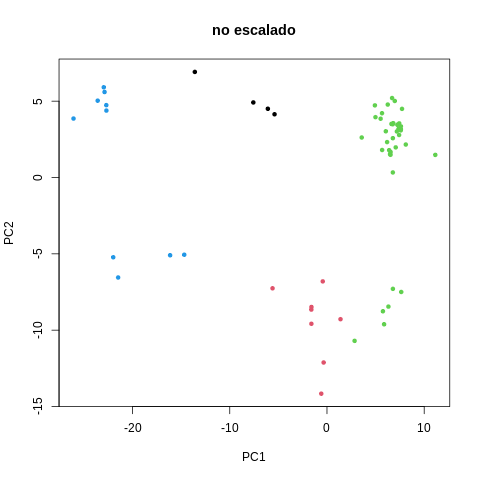

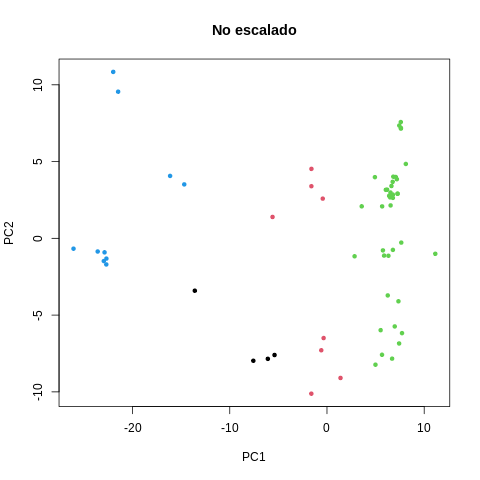

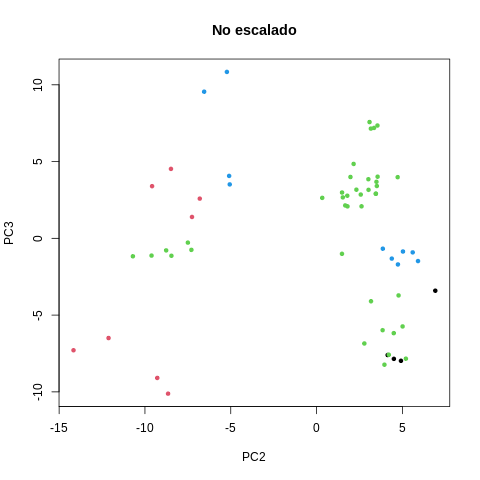

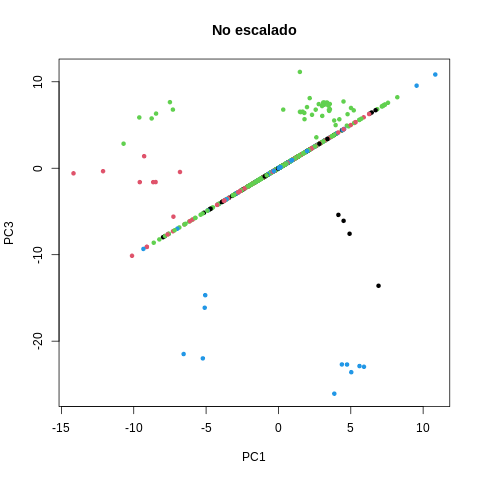

In [103]:
%%R
cluster_average_f <- as.factor(cluster_average)

plot(pca_virus$x[,1], pca_virus$x[,2], col=cluster_average_f, cex=.7, pch=19,
     xlab = "PC1", ylab="PC2", main="no escalado")
#legend(
#  x ="topleft",
#  legend = paste("", levels(df_jol$sex)), # for readability of legendç
#  col = c("#358094", "#E0AD7E"),
#  pch = 19, # same as pch=20, just smaller
#  cex = .7 # scale the legend to look attractively sized
#)
plot(pca_virus$x[,1], pca_virus$x[,3], col=cluster_average_f, cex=.7, pch=19,
     xlab = "PC1", ylab="PC2", main="No escalado")

plot(pca_virus$x[,2], pca_virus$x[,3], col=cluster_average_f, cex=.7, pch=19,
     xlab = "PC2", ylab="PC3", main="No escalado")

plot(pca_virus$x[,-1], pca_virus$x[,-2], col=cluster_average_f, cex=.7, pch=19,
     xlab = "PC1", ylab="PC3", main="No escalado")

**Solución/Explicación** aquí va lo que se va poner en el reporte

### iii) ¿Podría decir que alguno de los métodos de análisis de conglomerados refleja la clasificación propuesta por Fauquet et al. (1988)?

In [38]:
%%R 
# Aquí va el código 

# line 1
# line 2
# .
# .
# .

NULL


**Solución/Explicación** aquí va lo que se va poner en el reporte